In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
df= pd.read_csv('/content/drive/MyDrive/Tenx/Week 6/Data/complaints.csv')

/tmp/ipython-input-1-459577293.py:2: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df= pd.read_csv('/content/drive/MyDrive/Tenx/Week 6/Data/complaints.csv')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9609797 entries, 0 to 9609796
Data columns (total 18 columns):
 #   Column                        Dtype 
---  ------                        ----- 
 0   Date received                 object
 1   Product                       object
 2   Sub-product                   object
 3   Issue                         object
 4   Sub-issue                     object
 5   Consumer complaint narrative  object
 6   Company public response       object
 7   Company                       object
 8   State                         object
 9   ZIP code                      object
 10  Tags                          object
 11  Consumer consent provided?    object
 12  Submitted via                 object
 13  Date sent to company          object
 14  Company response to consumer  object
 15  Timely response?              object
 16  Consumer disputed?            object
 17  Complaint ID                  int64 
dtypes: int64(1), object(17)
memory usage: 1.3+

In [ ]:
df.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,Experian Information Solutions Inc.,FL,32092,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195687
1,2025-06-20,Debt collection,Telecommunications debt,Attempts to collect debt not owed,Debt is not yours,NaN,Company can't verify or dispute the facts in t...,"Eastern Account Systems of Connecticut, Inc.",FL,342XX,NaN,NaN,Web,2025-06-20,Closed with explanation,Yes,NaN,14195688
2,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,NaN,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",AZ,85225,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195689
3,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,NaN,Experian Information Solutions Inc.,AZ,85225,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195690
4,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Account status incorrect,NaN,NaN,Experian Information Solutions Inc.,IL,60628,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195692


**Initial EDA**

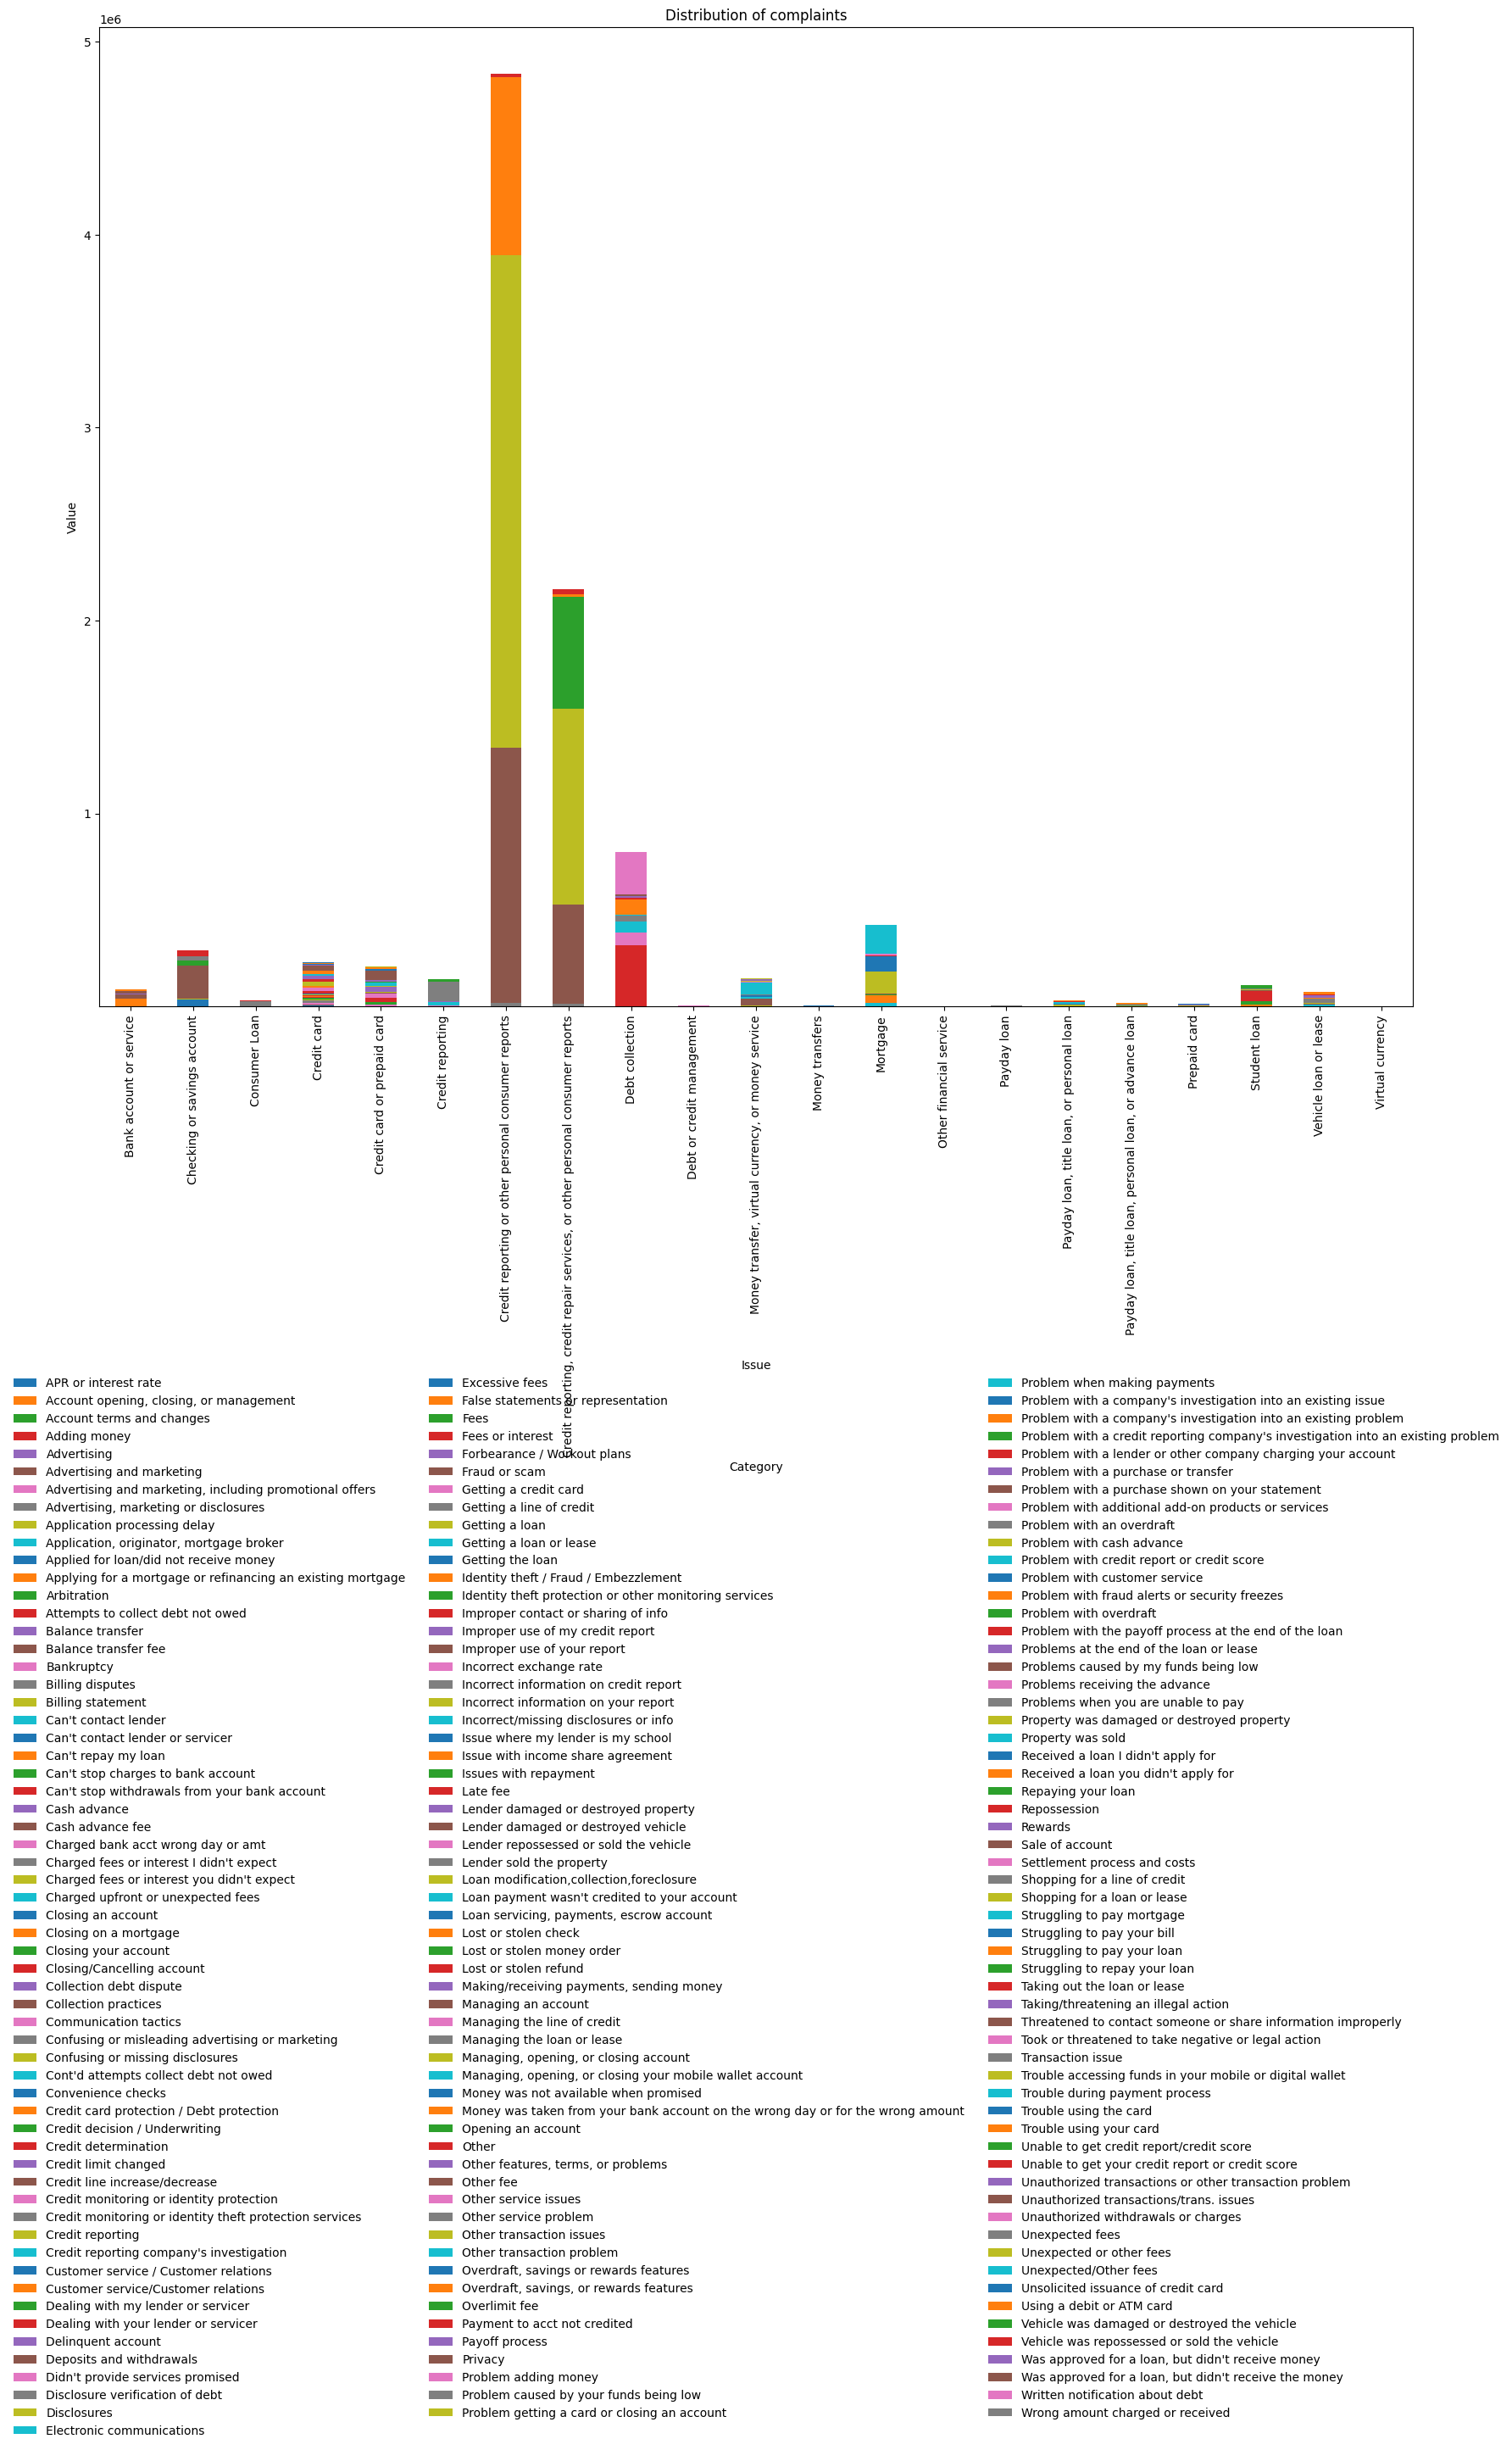

In [ ]:
#distribution of complaints
import matplotlib.pyplot as plt
#import matplotlib.cm as cm
issue_counts = df.groupby(['Product', 'Issue']).size().unstack(fill_value=0)
n_colors = issue_counts.shape[1]
colors = [cm.nipy_spectral(i / n_colors) for i in range(n_colors)]
ax=issue_counts.plot(kind='bar', figsize=(20, 15),stacked=True, linewidth=2)
plt.title('Distribution of complaints')
plt.ylabel('Value')
plt.xlabel('Category')
plt.legend(title='Issue', loc='upper center', bbox_to_anchor=(0.5, -0.45), ncol=3, frameon=False)
plt.xticks(rotation=90)
plt.show()

In [ ]:
# word count of the Consumer complaint narrative
#df['word_count'] = df['Consumer complaint narrative'].fillna('').str.split().str.len()

In [ ]:
# number of complaints with and without narratives
nan_count = df['Consumer complaint narrative'].isna().sum()
print(f"{nan_count} rows in Issues don't have narratives, while {(len(df)-nan_count)} rows have narratives")

6629041 rows in Issues don't have narratives, while 2980756 rows have narratives


**Filter the dataset**

In [ ]:
df['Product'].unique()

array(['Credit reporting or other personal consumer reports',
       'Debt collection', 'Credit card', 'Checking or savings account',
       'Money transfer, virtual currency, or money service',
       'Vehicle loan or lease', 'Debt or credit management', 'Mortgage',
       'Payday loan, title loan, personal loan, or advance loan',
       'Prepaid card', 'Student loan', 'Credit reporting',
       'Credit reporting, credit repair services, or other personal consumer reports',
       'Credit card or prepaid card',
       'Payday loan, title loan, or personal loan',
       'Bank account or service', 'Money transfers', 'Consumer Loan',
       'Payday loan', 'Other financial service', 'Virtual currency'],
      dtype=object)

In [ ]:
# Filter on product
filtered_df = df[df['Product'].isin(['Credit card','Credit card or prepaid card','Payday loan, title loan, personal loan, or advance loan','Payday loan, title loan, or personal loan','Consumer Loan','Checking or savings account',
       'Money transfer, virtual currency, or money service','Money transfers','Bank account or service','Virtual currency'])]

In [ ]:
# Filter on subproduct
final=filtered_df[~filtered_df['Sub-product'].isin(['General-purpose prepaid card', 'Government benefit card','Payroll card', 'Gift card', 'Student prepaid card','Vehicle loan','Vehicle lease','Checking account',
       'Other banking product or service','Other bank product/service','CD (Certificate of Deposit)','(CD) Certificate of deposit','Cashing a check without an account', 'Credit reporting','Debt settlement','Refund anticipation check'])]

In [ ]:
final=final.dropna(subset=['Consumer complaint narrative']).reset_index(drop=True)

In [ ]:
final.shape

(648444, 18)

**Clean the text**

In [ ]:
# word count of the Consumer complaint narrative
final['word_count'] = final['Consumer complaint narrative'].fillna('').str.split().str.len()

In [ ]:
final['word_count'].unique()

array([  91,  156,  233, ..., 1792, 1735, 1559])

In [ ]:
#Lowecase text
final['Consumer complaint narrative'] = final['Consumer complaint narrative'].str.lower()

In [ ]:
#Remove special character
final['Consumer complaint narrative']  = final['Consumer complaint narrative'] .str.replace(r'[^a-zA-Z0-9\s]', '', regex=True)

In [ ]:
final['Consumer complaint narrative'][100000]

'on xxxxxxxx i meant to send a billpay payment to citibank for a credit card account in the amount of xxxx i accidentally send them a payment for xxxx resulting in an overpayment of 2100000 i have been promised a refund as of xxxxxxxx and as of today xxxxxxxx i still have received no refund it has been almost 60 days since i first called in for a refund i have called 5 additional times over that timeframe each time escalating the lack of refund and citibank has done nothing except promise me a refund within the week and giving me no refund twice we have spent over an hour on the phone while they insist on verifying the payment with my bank which just wasted my time and made me even more upset at this point i do nt believe that citibank will give me any refund i believe that they intend to keep the overpayment the lack of refund is unethical and can not be legal how can they get away with treating customers this way'

In [ ]:
#Remove boiler plate text
final['Consumer complaint narrative']= final['Consumer complaint narrative'].str.replace('dear cfpb', '', regex=False)
final['Consumer complaint narrative']= final['Consumer complaint narrative'].str.replace('look forward for your reply', '', regex=False)
final['Consumer complaint narrative']= final['Consumer complaint narrative'].str.replace('thank you', '', regex=False)
final['Consumer complaint narrative']= final['Consumer complaint narrative'].str.replace('thank so much', '', regex=False)
final['Consumer complaint narrative']= final['Consumer complaint narrative'].str.replace('xxxx xxxx', '', regex=False)
final['Consumer complaint narrative']= final['Consumer complaint narrative'].str.replace('i am writing to file a complaint', '', regex=False)
final['Consumer complaint narrative']= final['Consumer complaint narrative'].str.replace('xxxx', '', regex=False)

In [ ]:
final.to_csv("/content/drive/MyDrive/Tenx/Week 6/filtered.csv",index=False)